## Касьянов Семен. Вариант 4

In [51]:
import matplotlib.pyplot as plt
import numpy as np

## Задание
Определить шаг интегрирования для точности $10^{-4}$ по формуле остаточного члена интерполяции формулы прямоугольников. Вычислить интеграл $\int\limits_1^{2.2}\cfrac{dx}{x^3 + x}$ по формуле прямоугольников, правилу 3/8 и методу Чебышева по трём точкам. Определить погрешность по правилу Рунге, сравнить с действительной ошибкой, выьрать наиболее точный метод. Построить график ошибки от шага интегрирования для наиболее точного метода Ньютона-Котеса.

Точное значение интеграла, посчитанное с помощью Photomath, равняется: $\frac{1}{2}\,\ln(\frac{121}{73})\,=\,0.252666$

In [25]:
int_value = 1/2 * np.log(121/73)
eps = 10**(-4)

In [26]:
# Функция, вычисляющая значение подынтегральной функции
def function(x):
    
    return 1 / (x**3 + x)

In [58]:
# Функция, возвращающая массив точек разбиения заданного отрезка
def point(n):

    a = np.linspace(1, 2.2, n)
    return a


## Метод прямоугольников

$I^n=h \sum_{k=1}^n f(x_k)$ - квадратурная формула метода правых прямоугольников

$\varepsilon\, \le\, \cfrac{h(b\, -\, a)}{2}\,\displaystyle\max_{a\,\le\,x\,\le\,b}\,f^{'}(x) $

In [28]:
# Вычислим h
h = 2 * eps / 1.2
h

0.0001666666666666667

Максимум производной подынтегральной функции на заданном отрезке равен 1. В таком случае $h\,=\,\cfrac{2\,\varepsilon}{b - a}\,=\, \frac{5}{3}*10^{-4}$

In [32]:
# Определим количество точек разбиения, зная шаг
n = int(1.2 / h) + 1
# Получим точки разбиения
points = point(n)

# Вычислим интеграл по квадратурной формуле
Isq = 0
for i in points[1::]:
    Isq += function(i)
Isq = Isq * h
Isq

0.2525952813109808

In [33]:
#Рассчитаем погрешность данного метода
print(abs(int_value - Isq))

7.027091319417034e-05


Как мы видим погрешность вычислений по согласно данному методу составила $\approx 7*10^{-5}$

## Правило 3/8

In [34]:
I3 = 0
for i in range(1, len(points)):
    I3 += (function(points[i - 1]) + 3 * function(points[i - 1] + h/3) + 3 * function(points[i - 1] + 2*h/3) + function(points[i])) / 8
I3 = I3 * h
I3

0.2526304634509363

In [35]:
#Рассчитаем погрешность данного метода
print(abs(int_value - I3))

3.5088773238656223e-05


Как мы видим погрешность вычислений по согласно данному методу составила $\approx 3.5*10^{-5}$. Примерно в два раза меньше, чем по формуле правых прямоугольников

## Метод Чебышева

В случае вычисления интеграла по методу Чебышева по трём точкам мы используем следующую формулу:\
\
$\int\limits_{-1}^{1}f(x)\,dx\,=\,\cfrac{2}{3}\,(f(-\cfrac{1}{\sqrt{2}})\,+\,f(0)\,+\,f(\cfrac{1}{\sqrt{2}}))$\
\
Для преобразования отрезка $[a, b]$ в $[-1, 1]$ используем следующую формулу:\
\
$x\,=\,\cfrac{b\,+\,a}{2}\,+\,\cfrac{b\,-\,a}{2}\,z$

In [36]:
#Создадим список точек, на которых будем вычислять:
points1 = [-np.sqrt(1/2), 0, np.sqrt(1/2)]
points = [(1 + 2.2) / 2 + (2.2 - 1) / 2 * i for i in points1] # Используем именно этот список точек

# Вычислим интеграл
I = 0
for i in points:
    I += function(i)
I *= 1.2 / 3
I

0.2517933447068943

In [37]:
# Погрешность
print(abs(I - int_value))

0.0008722075172806765


Как мы можем видеть, погрешность метода Чебышева на трёх точках составила $\approx 8.7*10^{-4}$, что значительно больше погрешностей двух предыдущих методов, но находится в пределах допустимой погрешности данного метода на трёх точках: $\varepsilon\,=\,\frac{1}{360}\,\displaystyle\max_{a\,\le\,x\,\le\,b}f^{(IV)}(x) = 0.075$

## Правило Рунге

Для вычисления погрешности методов правых прямоугольников и 3/8 мы используем следующую формулу:\
\
$I - I^{p}(\frac{h}{2})\,=\,\cfrac{I^{p}(\frac{h}{2})\,-\,I^{p}(h)}{2^{p}\,-\,1}$\
\
Значения интеграла, которые были вычислены нами до этого соответствуют $I^{p}(\frac{h}{2})$. Соответственно, нам нужно определить значения на разбиении с удвоенным шагом.\
\
Методу прямоугольников соответствует $p = 1$, правилу 3/8 - $p = 4$

In [13]:
# Метод прямоугольников
hnew = h * 2

n = int(1.2 / hnew) + 1
points = point(n)

# Вычислим интеграл по квадратурной формуле
I = 0
for i in points[1::]:
    I += function(i)
I = I * hnew

#Рассчитаем погрешность для прямоугольников
errorsq = (Isq - I) / (1)
errorsq

7.026671709420285e-05

Как мы видим, ошибка метода по правилу Рунге имеет расхождение с точными вычислениями в 8-м знаке после запятой

In [14]:
# Правило 3/8
hnew = h * 2

n = int(1.2 / hnew) + 1
points = point(n)

I = 0
for i in range(1, len(points)):
    I += (function(points[i - 1]) + 3 * function(points[i - 1] + h/3) + 3 * function(points[i - 1] + 2*h/3) + function(points[i])) / 8
I = I * h
I

# Рассчитаем погрешность для правила 3/8
error3 = (I3 - I) / (15)
error3

0.008421305507345347

Погрешность правила 3/8 равна $\approx 0.0084$ в соответствии с правилом Рунге, что оказалось больше действительной ошибки\
\
По результатам вычислений интеграла, самым точным оказалось правило 3/8, которое мы исследуем далее

## График ошибки от шага интегрирования

In [ ]:
ns = [i for i in range (2, 10000)] # Здесь храним количество точек разбиений
errors = [] # Здесь будем сохранять ошибки
hs = [] # Здесь храним шаги разбиений

for n in ns:
    print(n)
    h = 1.2 / (n - 1) # Получим шаг разбиения
    hs.append(h)
    points = point(n)

    # Вычислим интеграл по квадратурной формуле
    I = 0
    for i in range(1, len(points)):
        I += (function(points[i - 1]) + 3 * function(points[i - 1] + h/3) + 3 * function(points[i - 1] + 2*h/3) + function(points[i])) / 8
    I = I * h
    errors.append(abs(int_value - I))

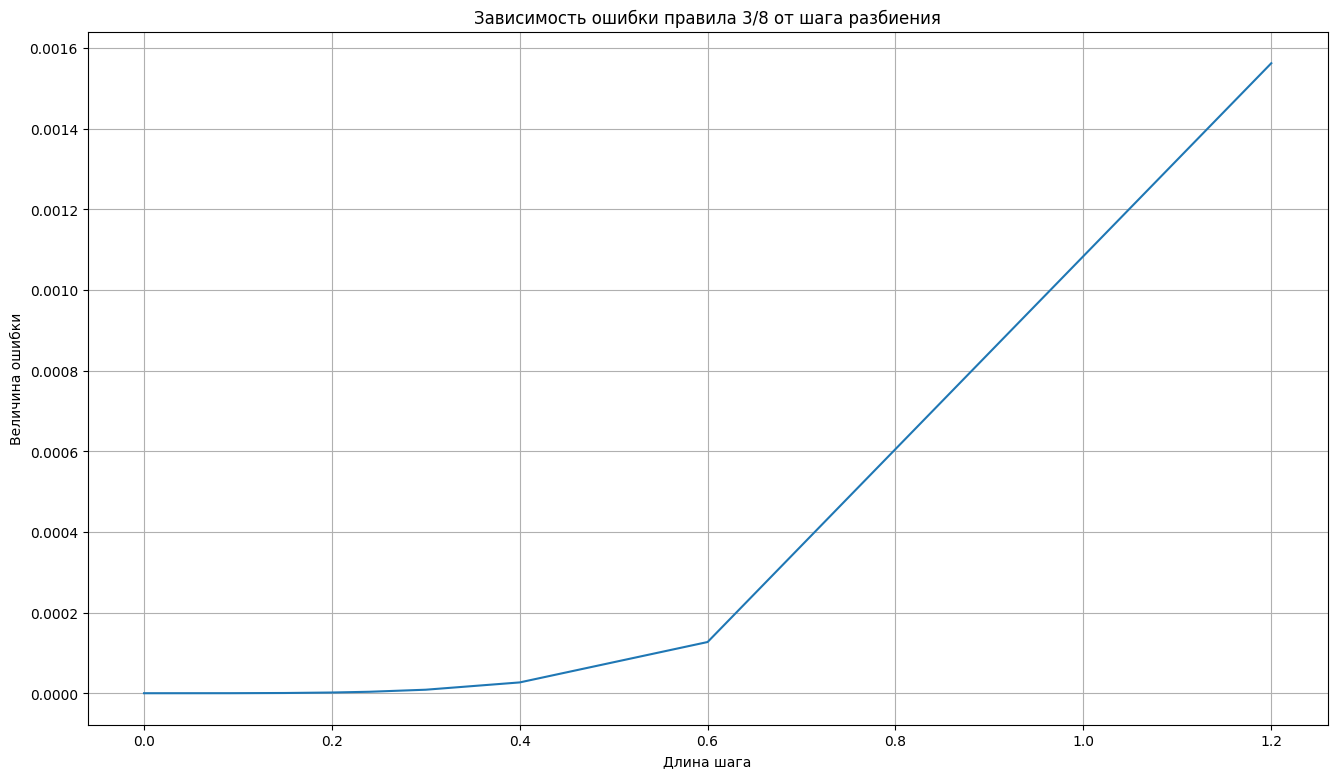

In [46]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.plot(hs, errors)
plt.xlabel('Длина шага')
plt.ylabel('Величина ошибки')
plt.title('Зависимость ошибки правила 3/8 от шага разбиения')
plt.show()